## Republic of Türkiye Ministry of Environment, Urbanism, and Climate Change - Air Quality Data Set


This dataset offers valuable insights into the air quality conditions recorded at the Kocaeli station over a substantial period, spanning from February 16, 2007, to August 8, 2023. The data set encompasses the following essential columns, each representing a specific air quality parameter:

* Date: The date when the air quality measurements were recorded.
* PM10 (µg/m³): This parameter represents the concentration of particulate matter with a diameter of 10 micrometers or less in the air. PM10 levels are crucial indicators of air pollution, as these fine particles can have significant health impacts when inhaled.
* PM2.5 (µg/m³): Similar to PM10, this column measures the concentration of even finer particulate matter, with a diameter of 2.5 micrometers or less. PM2.5 levels provide insights into finer particles that can penetrate deeper into the respiratory system, posing additional health risks.
* SO2 (µg/m³): This column denotes the concentration of sulfur dioxide, a gas primarily emitted from burning fossil fuels. Elevated SO2 levels can lead to respiratory issues and contribute to the formation of acid rain.
* NO2 (µg/m³): Nitrogen dioxide levels, indicated in this column, stem mainly from vehicle emissions and industrial activities. High NO2 concentrations can cause respiratory problems and contribute to smog formation.
* NOX (µg/m³): The NOX column encompasses various nitrogen oxide compounds, typically released during combustion processes. These compounds play a significant role in air pollution, impacting human health and the environment.
* NO (µg/m³): Nitric oxide levels, presented in this column, are produced during combustion, particularly in vehicle engines. NO is a precursor to NO2 and plays a role in atmospheric chemistry.

This comprehensive data set serves as a valuable resource for various data analysis applications, including exploratory data analysis and machine learning. It offers a window into the dynamics of air quality, allowing us to gain insights, identify trends, and make informed decisions in the context of environmental and public health considerations.


- The data set was obtained from the following internet address:
- https://sim.csb.gov.tr/STN/STN_Report/StationDataDownloadNew

### Air Quality Index Calculation

- After various statistical analyzes and manipulations on this data set, AQI values were calculated for Kocaeli station.
- For more detailed information, the codes below can be examined.

**Author: Süheyl Çavuşoğlu**

In [ ]:
!pip install aqicalc # aqicalc library has been installed to calculate AQI values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import aqicalc as aqi

In [2]:
df = pd.read_csv('kocaeli_air_quality_hourly.csv')
df.head() # first 5 rows

,Date,PM10 ( µg/m3 ),PM2.5 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
0,16.02.2007 00:00:56,107.89,NaN,3.36,NaN,NaN,NaN
1,16.02.2007 01:00:56,69.52,NaN,3.48,NaN,NaN,NaN
2,16.02.2007 02:00:56,48.66,NaN,3.42,NaN,NaN,NaN
3,16.02.2007 03:00:56,37.68,NaN,3.71,NaN,NaN,NaN
4,16.02.2007 04:00:56,60.49,NaN,3.13,NaN,NaN,NaN


- It appears that PM10 and SO2 values have been entered at the Kocaeli air quality monitoring station since February 16, 2007, but PM2.5, NO2, NOX, and NO values seem to be missing. 
- This might be due to the fact that only PM10 and SO2 values have been measured since February 16, 2007.

In [3]:
df.tail() # last 5 rows

,Date,PM10 ( µg/m3 ),PM2.5 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
144427,08.08.2023 19:00:56,24.88,0.07,6.99,51.15,108.55,37.51
144428,08.08.2023 20:00:56,21.88,2.03,6.70,52.32,127.37,49.05
144429,08.08.2023 21:00:56,18.59,3.03,6.89,50.47,118.47,44.45
144430,08.08.2023 22:00:56,9.49,4.03,6.53,54.72,148.74,61.45
144431,08.08.2023 23:00:56,20.59,5.00,6.73,51.46,147.30,62.64


In [4]:
df.shape # the dataset consists of 144432 rows and 7 columns.

(144432, 7)

In [5]:
df.info() # some informations about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144432 entries, 0 to 144431
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             144432 non-null  object 
 1   PM10 ( µg/m3 )   131414 non-null  float64
 2   PM2.5 ( µg/m3 )  41133 non-null   float64
 3   SO2 ( µg/m3 )    122709 non-null  float64
 4   NO2 ( µg/m3 )    39477 non-null   float64
 5   NOX ( µg/m3 )    39175 non-null   float64
 6   NO ( µg/m3 )     40467 non-null   float64
dtypes: float64(6), object(1)
memory usage: 7.7+ MB


- The data type of the "Date" column appears to be 'object'. To conduct temporal analysis, we can change its data type to 'datetime'.

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y %H:%M:%S") # datatype converted to 'datetime'.

In [7]:
df.isnull().sum() # missing values in the dataset

Date                    0
PM10 ( µg/m3 )      13018
PM2.5 ( µg/m3 )    103299
SO2 ( µg/m3 )       21723
NO2 ( µg/m3 )      104955
NOX ( µg/m3 )      105257
NO ( µg/m3 )       103965
dtype: int64

In [8]:
df.describe() # some statistical data

,PM10 ( µg/m3 ),PM2.5 ( µg/m3 ),SO2 ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
count,131414.000000,41133.000000,122709.000000,39477.000000,39175.000000,40467.000000
mean,55.747595,19.134022,7.618584,27.557259,84.062001,36.098222
std,44.738789,15.644734,21.013918,24.522585,96.105708,55.233041
min,0.000000,0.000000,0.000000,0.000000,0.670000,0.010000
25%,29.070000,8.970000,1.670000,10.320000,24.260000,4.460000
50%,43.970000,14.700000,2.860000,19.910000,52.900000,15.840000
75%,67.637500,24.110000,5.970000,37.410000,105.500000,43.030000
max,972.230000,157.290000,1550.880000,239.480000,1236.730000,794.980000


In [9]:
for col in df.columns:
    new_col_name = col.replace('( µg/m3 )', '').strip()                                         # no need to display the units in the column names.
    df.rename(columns={col: new_col_name}, inplace=True)                                        # therefore, the units were removed from the column names
    
    missing_percentage = df[new_col_name].isnull().mean() * 100                                 # null values were observed in the data set.
    print("Column '{}' has {:.2f}% missing values.\n".format(new_col_name, missing_percentage)) # the percentage of null values in the data was checked for better agreement.

Column 'Date' has 0.00% missing values.

Column 'PM10' has 9.01% missing values.

Column 'PM2.5' has 71.52% missing values.

Column 'SO2' has 15.04% missing values.

Column 'NO2' has 72.67% missing values.

Column 'NOX' has 72.88% missing values.

Column 'NO' has 71.98% missing values.



- Graphs can be drawn so that missing data can be observed more easily.

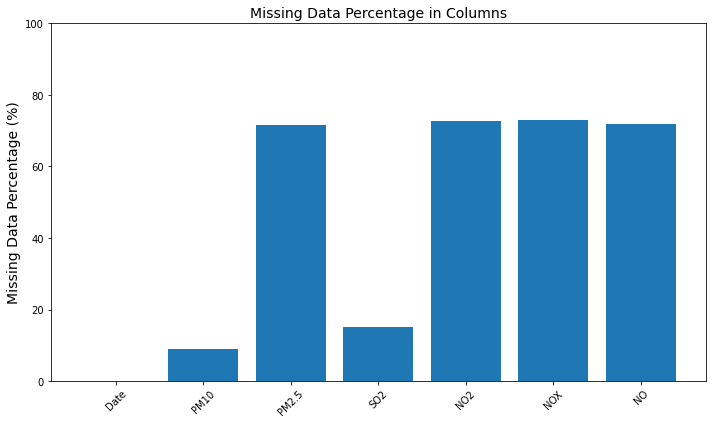

In [10]:
missing_percentage = df.isnull().mean() * 100

plt.figure(figsize=(10, 6))
plt.bar(missing_percentage.index, missing_percentage)
plt.ylim(0, 100)
plt.ylabel('Missing Data Percentage (%)', fontsize=14)
plt.title('Missing Data Percentage in Columns', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There are notably a significant number of missing values in columns such as PM2.5, NO2, NOX, and NO. These pollutants might have started being measured at a much later date compared to PM10 and SO2. It could be useful to identify the date when all pollutants were simultaneously measured and perform analysis on measurements taken after that date.
- Let's check the dates when measurements of all pollutants started.

In [11]:
cut_off_date = df['Date'].min()                                       # Initialized cut_off_date as the minimum date in the data

for column in df.columns[1:]:                                         # looped through each column (except 'Date') to find the latest non-null date
    first_non_null_date = df.dropna(subset=[column]).iloc[0]['Date']  # first non-null date in the column
    print(f"'{column}', started to be recorded from {first_non_null_date.date()}.")

    if first_non_null_date > cut_off_date:                            # updating cut_off_date if the first non-null date is later than the current cut_off_date
        cut_off_date = first_non_null_date

cut_off_date += pd.DateOffset(days=1)       # In order to avoid missing data, the date of data entry was determined as the day following the specified data entry, since data may not be entered exactly at midnight.
df_new = df[df['Date'] >= cut_off_date]     # Creating a new DataFrame with data starting from the determined cut-off date.

print("\nThe cut_off_date is:", cut_off_date.date())

'PM10', started to be recorded from 2007-02-16.
'PM2.5', started to be recorded from 2018-10-19.
'SO2', started to be recorded from 2007-02-16.
'NO2', started to be recorded from 2018-10-19.
'NOX', started to be recorded from 2018-10-19.
'NO', started to be recorded from 2018-10-19.

The cut_off_date is: 2018-10-20


- The pollutants PM2.5, NO2, NOX, and NO have started to be measured as of October 19, 2018. A new DataFrame is created with data from the cut_off_date set for more accurate results.

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42082 entries, 102350 to 144431
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    42082 non-null  datetime64[ns]
 1   PM10    40182 non-null  float64       
 2   PM2.5   41112 non-null  float64       
 3   SO2     41539 non-null  float64       
 4   NO2     39454 non-null  float64       
 5   NOX     39152 non-null  float64       
 6   NO      40444 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 MB


In [13]:
for col in df_new.columns:
    missing_percentage = df_new[col].isnull().mean() * 100
    print("Column '{}' has {:.2f}% missing values.\n".format(col, missing_percentage))

Column 'Date' has 0.00% missing values.

Column 'PM10' has 4.51% missing values.

Column 'PM2.5' has 2.31% missing values.

Column 'SO2' has 1.29% missing values.

Column 'NO2' has 6.24% missing values.

Column 'NOX' has 6.96% missing values.

Column 'NO' has 3.89% missing values.



- As of October 20, 2018, upon reevaluation of the recorded data, it is observed that the percentage of missing data has decreased. Now, strategies to handle these missing values can be considered.

#### **Strategies For Handling Missing Data**

- There are different ways to deal with missing data. If the percentage of missing values is relatively small, removing rows or columns with missing data may be considered. However, caution should be exercised as this approach may result in data loss. 
- The following methods can also be applied instead of deleting the missing data from the data set:

**_Data Imputation:_** Data imputation involves filling in missing values with estimated or calculated values. This can be done using statistical measures such as mean, median, or mode.

**_Forward and Backward Fill:_** For time series data, forward or backfill can be used to fill in missing values using previous or next values. This can help maintain the chronological order of the data.

**_Machine Learning-Based Imputation:_**  Machine learning models can be trained to predict missing values based on other features in the dataset. This approach can capture complex relationships and give accurate results.

**_Interpolation Techniques:_** Interpolation involves estimating values based on models of available data points. Methods such as linear, polynomial and time series interpolation can be useful depending on the nature of the data.

**_Imputation of Missing Data using Nearest Neighbors:_** In this method, missing values are filled with the values of the nearest neighboring data points among the available data points. The fundamental idea is to estimate missing data using values from other data points that share similar characteristics. This approach is particularly effective for datasets with time-dependent data or patterns.

- In order to achieve the most accurate imputation of missing data, various methods can be tested, and the one with the lowest error can be selected among these methods. 
- However, such an assessment has not been deemed necessary for this dataset. 
- The missing values will be filled using the nearest neighbors method. 
- For this purpose, the KNNImputer from the scikit-learn library can be utilized.

In [14]:
from sklearn.impute import KNNImputer # KNNImputer is imported

df_filled_knn = df_new.copy() # a copy was created to protect the dataframe with missing data just in case.
imputer = KNNImputer() # The default value of the n_neighbors parameter is 5. The default value is suitable for this project. This value can be changed for more precise settings and the results can be compared.

df_filled_knn.iloc[:, 1:] = imputer.fit_transform(df_filled_knn.iloc[:, 1:]) # Date column excluded.

- Null values checked again.

In [15]:
df_filled_knn.isnull().sum()  # 0 null values

Date     0
PM10     0
PM2.5    0
SO2      0
NO2      0
NOX      0
NO       0
dtype: int64

- All null values were filled using the nearest neighbors method. 
- Statistical analyzes can be examined with various visualizations.

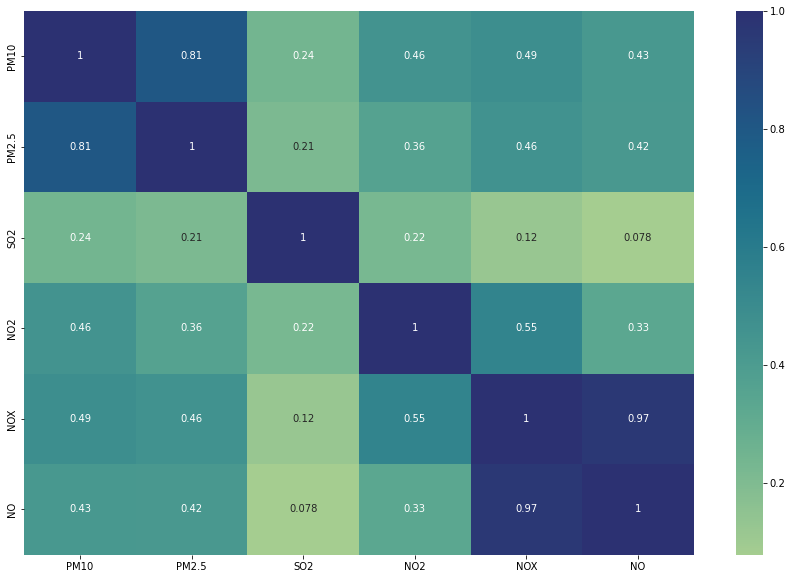

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df_filled_knn.corr(), annot=True, cmap="crest"); # This heat map shows the correlation of pollutants with each other. The highest correlations are between NOX - NO and PM10 - PM2.5.

- Columns with high correlation can also be observed with the scatter plot below.

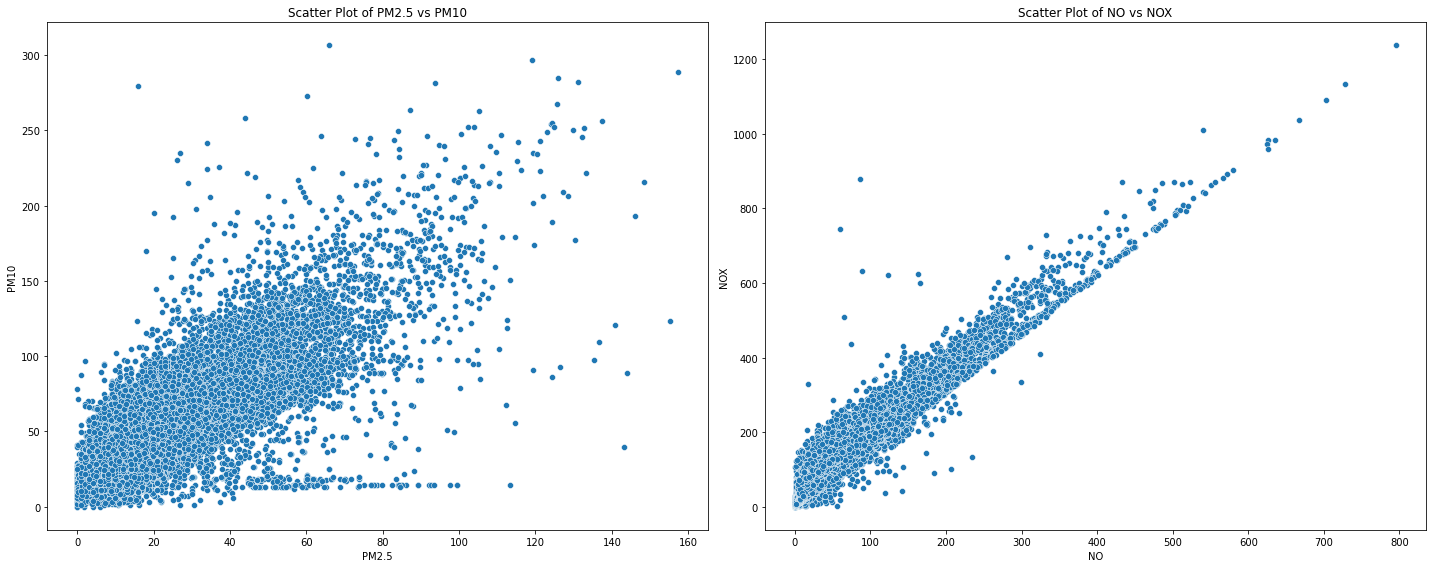

In [17]:
correlation_matrix = df_filled_knn.corr()
high_correlation_cols = set()
correlation_threshold = 0.7

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_correlation_cols.add((col1, col2))

plt.figure(figsize=(20, 8))
num_plots = len(high_correlation_cols)

for i, (col1, col2) in enumerate(high_correlation_cols, start=1):
    plt.subplot(1, num_plots, i)
    sns.scatterplot(x=col1, y=col2, data=df_filled_knn)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()

- The mean, minimum, maximum, quartile and std values of the initial state of the data set were observed with the describe method.

- Let's examine these values with boxplots in the final version of the dataset.

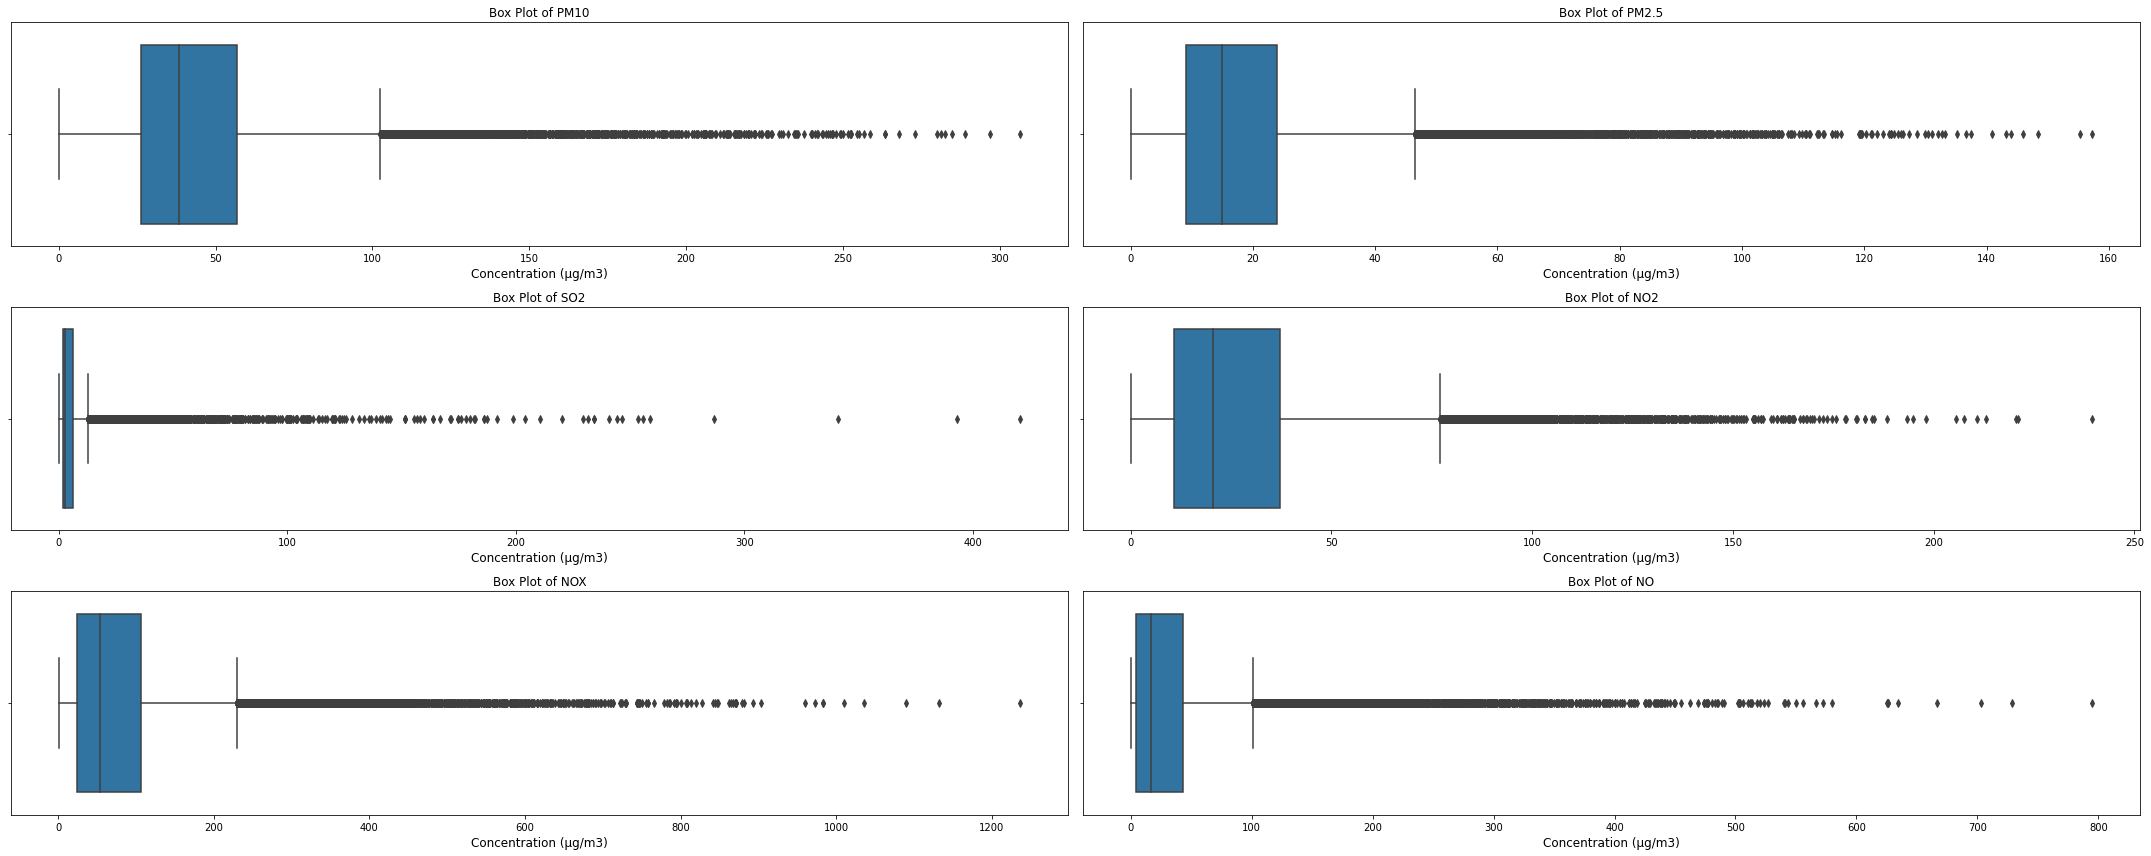

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(30, 12))

for i, column in enumerate(df_filled_knn.columns[1:]): # Date column excluded.
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(x=df_filled_knn[column], ax=ax)
    ax.set_title(f'Box Plot of {column}', fontsize=12)
    ax.set_xlabel('Concentration (µg/m3)', fontsize=12)

plt.tight_layout()
plt.show()

- The number of outliers seems large, but the data set is also quite large.
- According to the boxplots, the data does not appear to be normally distributed.
- A more detailed analysis can be performed to investigate the impact of the outliers and how the data set is distributed.

In [19]:
data_dict = {
    "Column": [],
    "Minimum": [],
    "25th Percentile (Q1)": [],
    "Mean": [],
    "Median": [],
    "75th Percentile (Q3)": [],
    "Maximum": [],
    "Outlier Count": [],
    "Outlier Ratio (%)": [],
    "Mean (without outliers)": [],
    "Median (without outliers)": []
}

for column in df_filled_knn.columns[1:]:
    column_data = df_filled_knn[column]
    stats = column_data.describe()
    iqr = stats['75%'] - stats['25%']
    lower_bound = stats['25%'] - 1.5 * iqr
    upper_bound = stats['75%'] + 1.5 * iqr
    outlier_count = np.sum((column_data < lower_bound) | (column_data > upper_bound))
    outlier_ratio = outlier_count / len(column_data) * 100
    without_outliers = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]
    mean_no_outliers = without_outliers.mean()
    median_no_outliers = without_outliers.median()

    data_dict["Column"].append(column)
    data_dict["Minimum"].append(stats['min'])
    data_dict["25th Percentile (Q1)"].append(stats['25%'])
    data_dict["Mean"].append(stats['mean'])
    data_dict["Median"].append(stats['50%'])
    data_dict["75th Percentile (Q3)"].append(stats['75%'])
    data_dict["Maximum"].append(stats['max'])
    data_dict["Outlier Count"].append(outlier_count)
    data_dict["Outlier Ratio (%)"].append(outlier_ratio)
    data_dict["Mean (without outliers)"].append(mean_no_outliers)
    data_dict["Median (without outliers)"].append(median_no_outliers)

df_stats = pd.DataFrame(data_dict)
df_stats

,Column,Minimum,25th Percentile (Q1),Mean,Median,75th Percentile (Q3),Maximum,Outlier Count,Outlier Ratio (%),Mean (without outliers),Median (without outliers)
0,PM10,0.00,26.27,45.508435,38.260,56.7375,306.50,1704,4.049237,41.573386,37.310
1,PM2.5,0.00,9.00,19.100593,14.860,24.0000,157.29,2672,6.349508,16.134099,13.940
2,SO2,0.00,1.69,6.713710,2.860,6.1975,420.81,6255,14.863837,3.206339,2.490
3,NO2,0.00,10.66,27.611506,20.530,37.2175,239.48,2019,4.797776,23.985779,19.340
4,NOX,0.67,24.63,84.017190,54.020,106.4575,1236.73,2864,6.805760,64.453233,49.225
5,NO,0.01,4.68,36.189931,16.545,43.2600,794.98,3746,8.901668,22.608276,13.720


#### This output contains a basic statistical summary for each column in the dataset, including outlier counts, outlier ratios, and mean and median values excluding outliers. Here are some comments that can be made based on this output:

- The "PM10" column indicates a wide distribution, with the median value lying between Q1 and Q3. The number of outliers is 4.05%. The mean and median values excluding outliers are close to each other and higher due to the influence of outliers.

- The "PM2.5" column has a lower mean and median, with an outlier count of 6.35%. The mean and median values excluding outliers are close to each other and lower.

- The "SO2" column shows a large spread, with little increase after Q3. The number of outliers is quite high (14.86%). The mean and median values excluding outliers are lower.

- The "NO2" column has a moderately wide spread and falls between Q1 and Q3. The outlier count is 4.80%. The mean and median values excluding outliers are close to each other.

- The "NOX" column has a wide spread and shows a significant increase from Q1 to Q3. The outlier count is 6.81%. The mean and median values excluding outliers are higher.

- The "NO" column indicates a wide distribution, with the median value lying between Q1 and Q3. The number of outliers is quite high (8.90%). The mean and median values excluding outliers are close to each other and lower.

These comments illustrate the distribution, mean, median, and outlier presence for each column. Cases with outliers indicate the influence of these values on the distributions, while excluding outliers typically brings the mean closer to the median.

In addition, the minimum values in all columns were observed to be 0 or very close to zero. The number of values that are 0 can be checked to see if this will pose a problem.

In [20]:
zero_count = df_filled_knn.eq(0).sum()
zero_count

Date      0
PM10      1
PM2.5    29
SO2      17
NO2       2
NOX       0
NO        0
dtype: int64

- The value of 0 is most frequently observed in the PM2.5 column, even though it constitutes a very small portion of the entire dataset. 
- The reason for the presence of 0 values could be due to the fact that the measurements were taken on days with heavy rainfall (because pollutants in the air can be transported to terrestrial and aquatic ecosystems with precipitation), other atmospheric conditions or due to technical issues with the measurement devices.

#### The Skewness and Kurtosis values can be observed to see in more detail what kind of distribution the data set has.

Skewness:

A skewness value between -1 and 1 (approximately) indicates a roughly symmetric distribution.
A skewness value less than -1 or greater than 1 indicates a significantly skewed distribution.

Kurtosis:

A kurtosis value around 0 indicates that the distribution has a similar shape to a normal distribution.
A kurtosis value less than 0 (negative kurtosis) indicates a distribution with lighter tails and fewer outliers.
A kurtosis value greater than 0 (positive kurtosis) indicates a distribution with heavier tails and potentially more outliers.

In [21]:
for i in df_filled_knn.columns[1:]:
    print(f'Skewness value of {i}: {df_filled_knn[i].skew():.2f}')
    print(f'Kurtosis value of {i}: {df_filled_knn[i].kurtosis():.2f}')
    print('-' * 25)

Skewness value of PM10: 2.08
Kurtosis value of PM10: 7.33
-------------------------
Skewness value of PM2.5: 2.16
Kurtosis value of PM2.5: 6.85
-------------------------
Skewness value of SO2: 8.73
Kurtosis value of SO2: 153.80
-------------------------
Skewness value of NO2: 1.83
Kurtosis value of NO2: 4.71
-------------------------
Skewness value of NOX: 2.90
Kurtosis value of NOX: 12.86
-------------------------
Skewness value of NO: 3.48
Kurtosis value of NO: 18.09
-------------------------


- PM10: The positive skewness indicates that the distribution of PM10 values is skewed to the right, with a longer tail on the right side of the distribution. The high kurtosis value suggests that the distribution has heavier tails than a normal distribution, indicating the presence of potential outliers and extreme values.
- PM2.5: Similar to PM10, PM2.5 also has positive skewness, indicating a right-skewed distribution. The kurtosis value is still elevated, indicating the presence of outliers or a heavy-tailed distribution, but it is somewhat lower than PM10.
- SO2: The extremely high skewness and kurtosis values for SO2 indicate a distribution that is highly skewed to the right and has very heavy tails, suggesting a significant presence of extreme values or outliers in the data.
- NO2: NO2 also has a positive skewness, indicating a rightward shift, but with a lower magnitude compared to SO2. The kurtosis value suggests that the distribution of NO2 is somewhat heavy-tailed but not as extreme as SO2.
- NOX: NOX exhibits positive skewness, indicating a right-skewed distribution. The kurtosis value suggests heavier tails than a normal distribution, but it's not as extreme as SO2.
- NO: NO has positive skewness with a longer tail on the right side. The kurtosis value indicates heavy tails, but again, not as extreme as SO2.

Distributions can be visualized as follows:

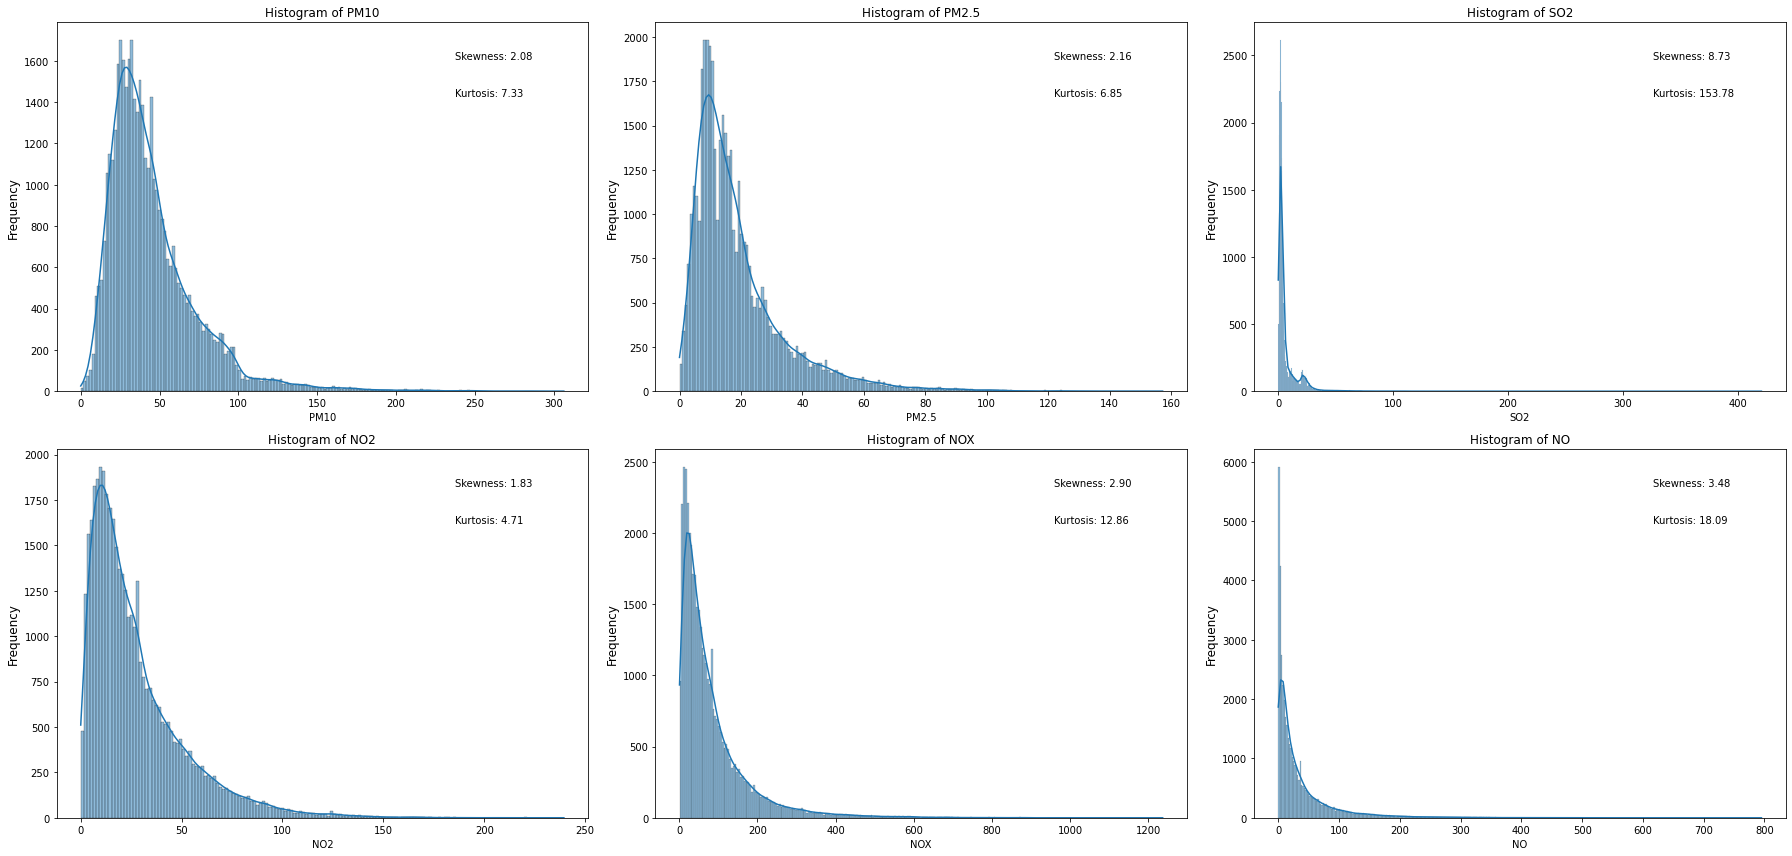

In [22]:
plt.figure(figsize=(25, 12))

for column in df_filled_knn.columns[1:]:
    plt.subplot(2, 3, df_filled_knn.columns.get_loc(column))
    sns.histplot(df_filled_knn[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.ylabel('Frequency', fontsize=12)

    skew_value = skew(df_filled_knn[column])
    kurtosis_value = kurtosis(df_filled_knn[column])
    
    plt.text(0.75, 0.9, f'Skewness: {skew_value:.2f}', transform=plt.gca().transAxes)
    plt.text(0.75, 0.8, f'Kurtosis: {kurtosis_value:.2f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

- When the histograms are examined, all the columns in the data set appear skewed to the right. 
- In such cases, the median is considered a more robust statistical measure, less affected by the effects of extreme values in the data set. 
- However, since air quality assessments generally use averages, average values are preferred in this analysis.

### Graphs can be drawn to observe pollutant concentrations at a desired date. Examples are given below.

### Graph of Hourly Changes


In [23]:
df_filled_knn.set_index('Date', inplace=True)  # The 'Date' column is set as an index to facilitate date based queries.

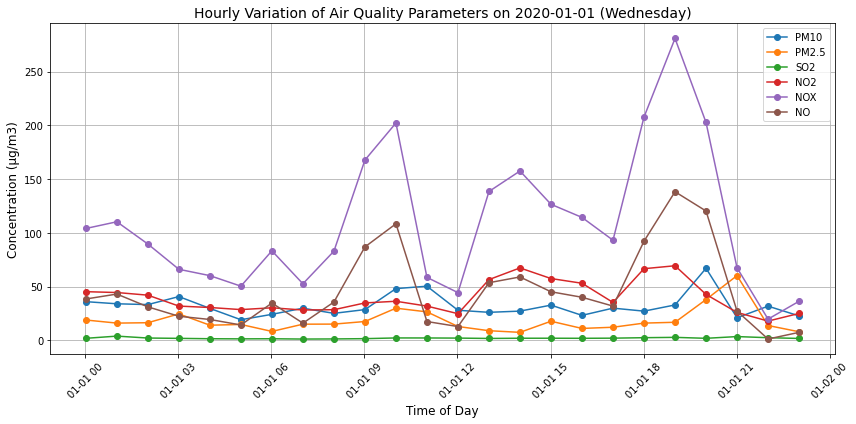

In [24]:
start_date = df_filled_knn.index.min().date()       # first day of sampling
end_date = df_filled_knn.index.max().date()         # last day of sampling

input_date = input(f'Enter a date between {start_date} and {end_date} (yyyy-mm-dd): ')       # selecting a day for hourly changes

selected_date = pd.to_datetime(input_date).date()  # Convert input to datetime.date

if start_date <= selected_date <= end_date:      # checking if the selected date is within the valid range
    selected_day_data = df_filled_knn[df_filled_knn.index.date == selected_date]     # filtering data for the selected date
    day_name = selected_date.strftime("%A")
    plt.figure(figsize=(12, 6))    # plotting the selected day's hourly variation

    for column in selected_day_data.columns:
        plt.plot(selected_day_data.index, selected_day_data[column], marker='o', linestyle='-', label=column)
        
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Concentration (µg/m3)', fontsize=12)
    plt.title(f'Hourly Variation of Air Quality Parameters on {selected_date} ({day_name})', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f'No data available for the selected date. Please enter a date between {start_date} and {end_date}.')

- Graphs can also be drawn by giving a date range. For example, hourly changes of the days between 2020-01-06 and 2020-01-15 can be observed.
- Note: The limit for readability is 10 days. Even if a longer range is selected, up to 10 graphs will be plotted. If desired, this limit can be changed from the code below.

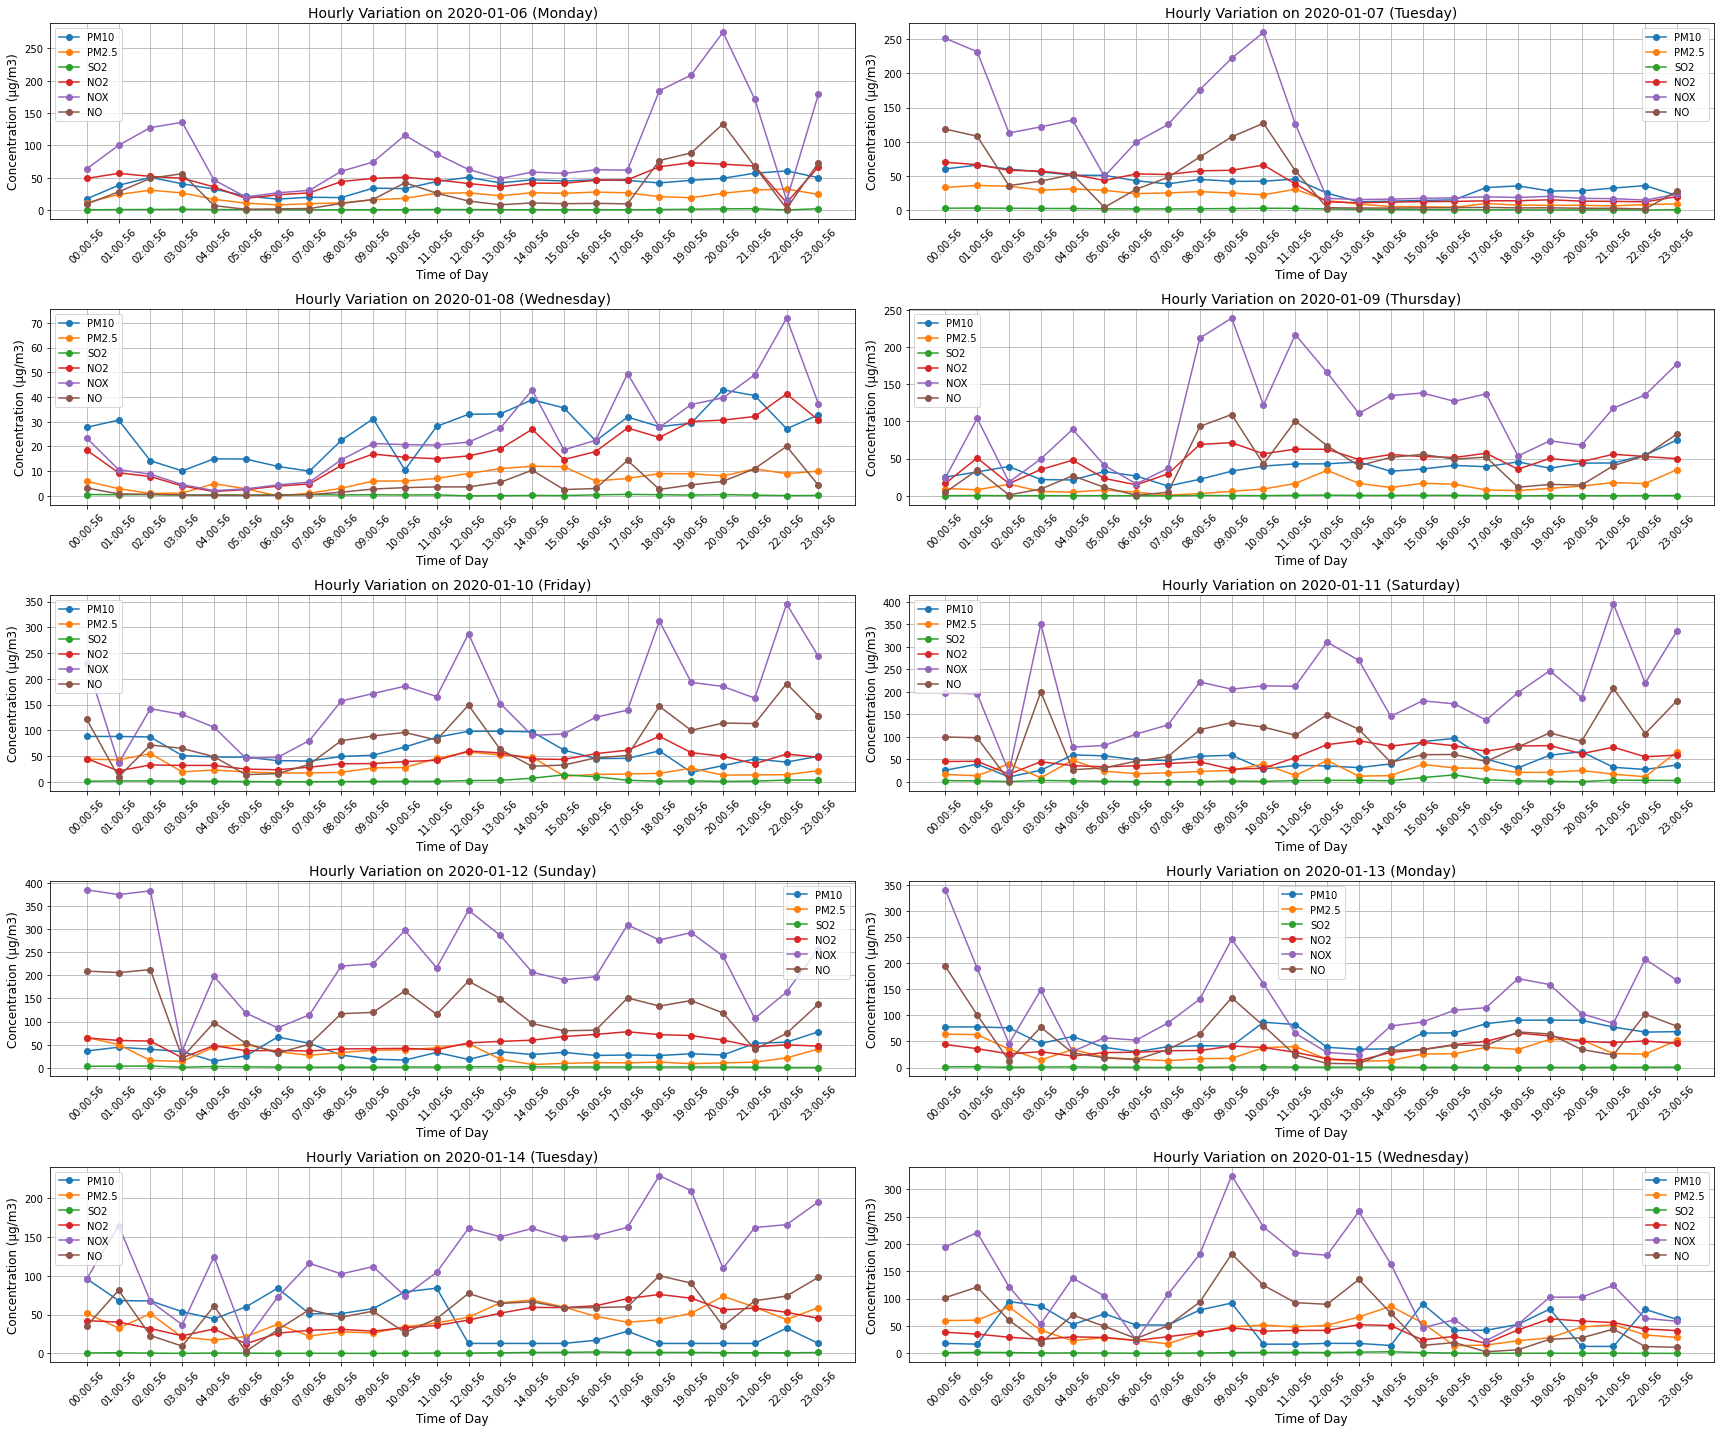

In [25]:
start_date = df_filled_knn.index.min().date()       # first day of sampling
end_date = df_filled_knn.index.max().date()         # last day of sampling

input_start_date = input(f"Enter the start date between {start_date} and {end_date} (yyyy-mm-dd): ")        # selecting start day
input_end_date = input(f"Enter the end date between {input_start_date} and {end_date} (yyyy-mm-dd): ")      # selecting end day

start_datetime = pd.to_datetime(input_start_date)
end_datetime = pd.to_datetime(input_end_date)

if start_date <= start_datetime.date() <= end_datetime.date() <= end_date:
    filtered_data = df_filled_knn[(df_filled_knn.index.date >= start_datetime.date()) &
                                  (df_filled_knn.index.date <= end_datetime.date())]

    unique_dates = np.unique(filtered_data.index.date)  # unique dates within the range

    # some settings for subplots
    
    num_days = len(unique_dates)
    num_plots = min(num_days, 10)
    cols = 2
    rows = -(-num_plots // cols)
    fig, axes = plt.subplots(rows, cols, figsize=(24, 20))

    for i, date in enumerate(unique_dates[:num_plots]):
        selected_day_data = filtered_data[filtered_data.index.date == date]
        
        day_of_week = date.weekday()
        day_name = date.strftime("%A")
        
        if num_plots > 1:
            ax = axes[i // cols, i % cols]
        else:
            ax = axes
        for column in selected_day_data.columns:
            ax.plot(selected_day_data.index, selected_day_data[column], marker='o', linestyle='-', label=column)

        ax.set_xlabel('Time of Day', fontsize=12)
        ax.set_ylabel('Concentration (µg/m3)', fontsize=12)
        ax.set_title(f'Hourly Variation on {date} ({day_name})', fontsize=14)
        ax.set_xticks(selected_day_data.index)
        ax.set_xticklabels(selected_day_data.index.time, rotation=45)
        ax.legend()
        ax.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f'Invalid date range. Please enter dates between {start_date} and {end_date}.')

- When hourly measurements are examined, it is seen that NOX is measured at the highest concentrations.

#### Graph of Monthly Changes

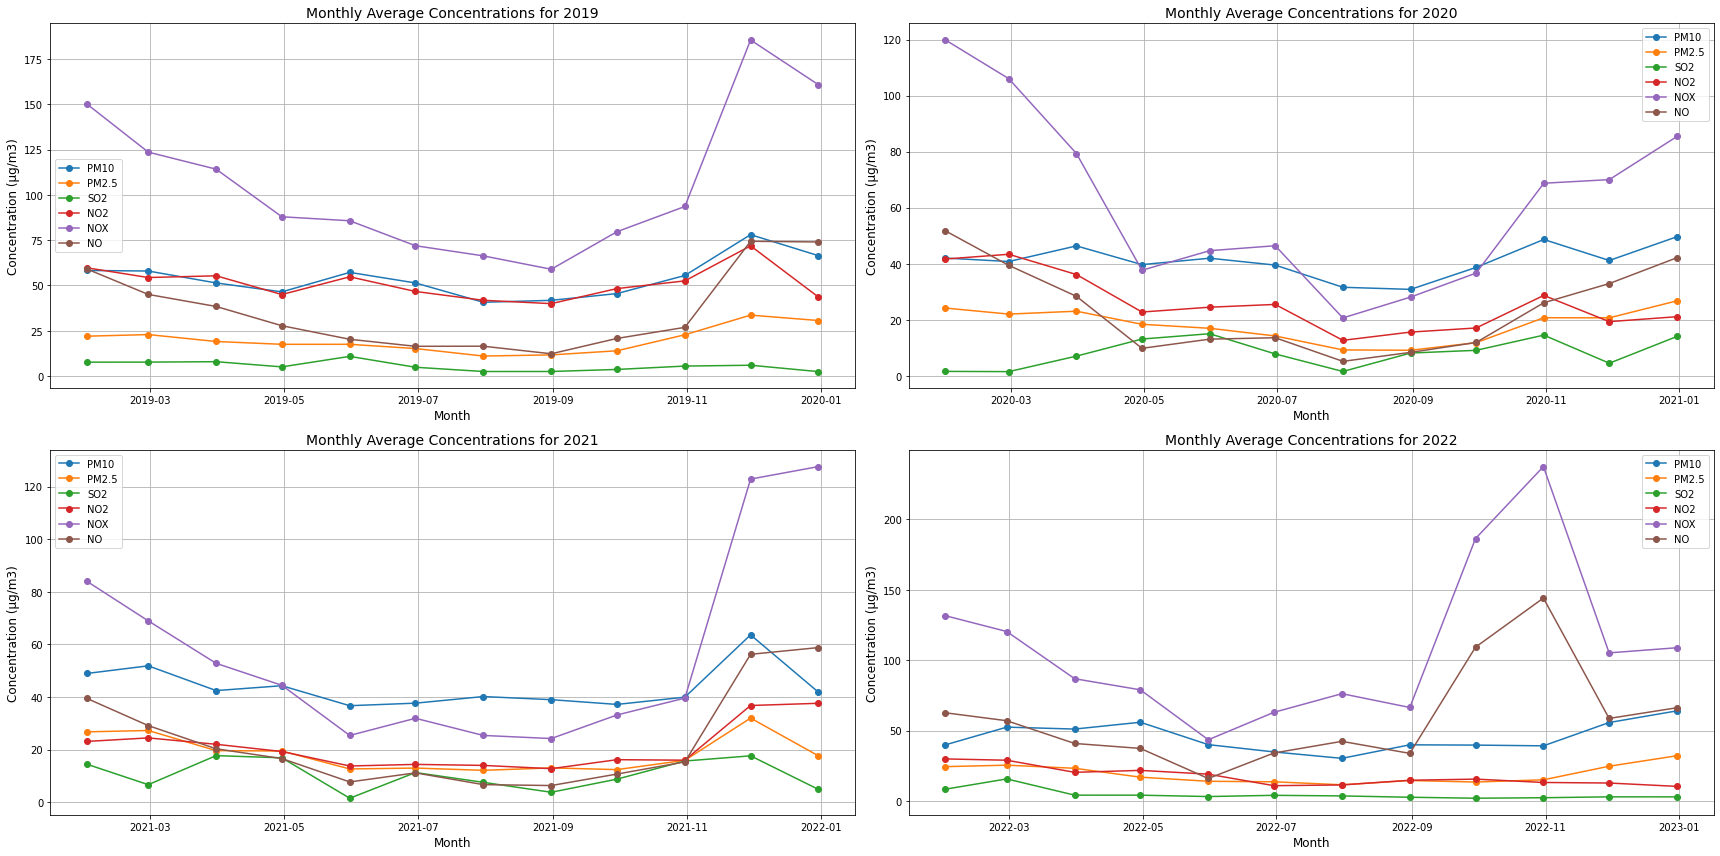

In [26]:
df_monthly_averages = df_filled_knn.resample('M').mean()

plt.figure(figsize=(24, 12))
years_to_plot = [2019, 2020, 2021, 2022] # The years 2019, 2020, 2021 and 2022 were chosen because there are no measurements in all months of 2018 and 2023.

for i, year in enumerate(years_to_plot):
    plt.subplot(2, 2, i + 1)
    year_data = df_monthly_averages[df_monthly_averages.index.year == year]
    
    for column in year_data.columns:
        plt.plot(year_data.index, year_data[column], marker='o', linestyle='-', label=column)

    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Concentration (µg/m3)', fontsize=12)
    plt.title(f'Monthly Average Concentrations for {year}', fontsize=14)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

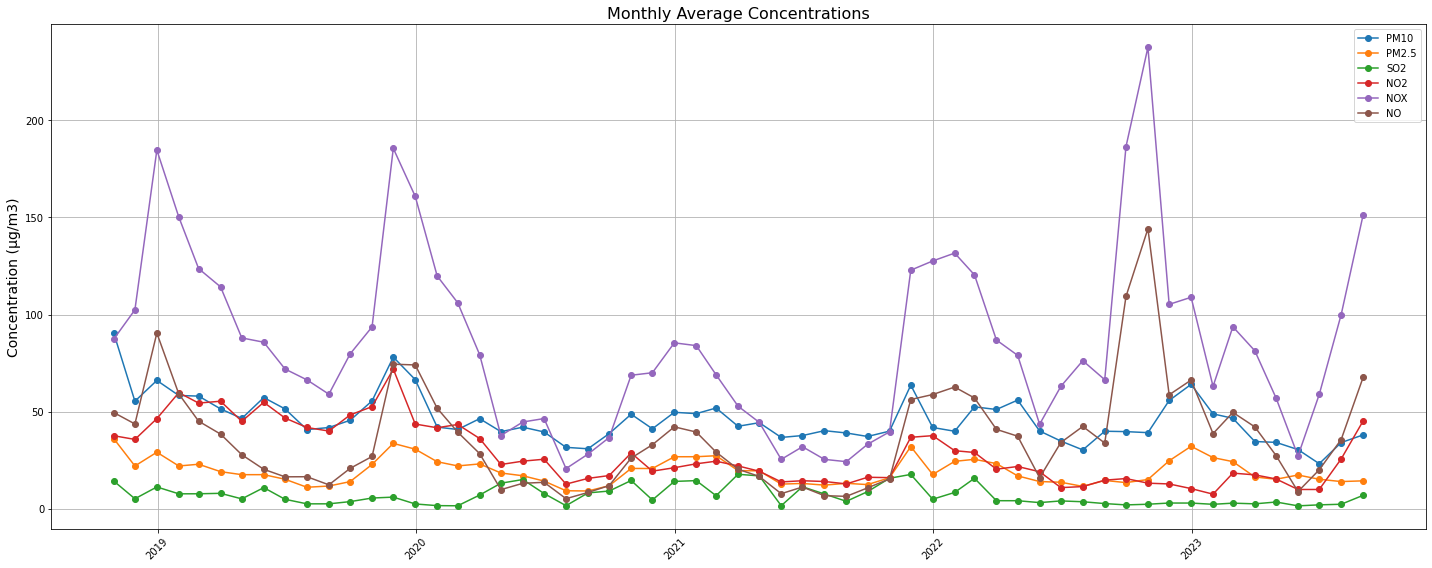

In [27]:
monthly_averages = df_filled_knn.resample('M').mean()

plt.figure(figsize=(20, 8))

for column in monthly_averages.columns:
    plt.plot(monthly_averages.index, monthly_averages[column], label=column, marker='o', linestyle='-')

plt.ylabel('Concentration (µg/m3)', fontsize=14)
plt.title('Monthly Average Concentrations', fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Graph of Yearly Changes

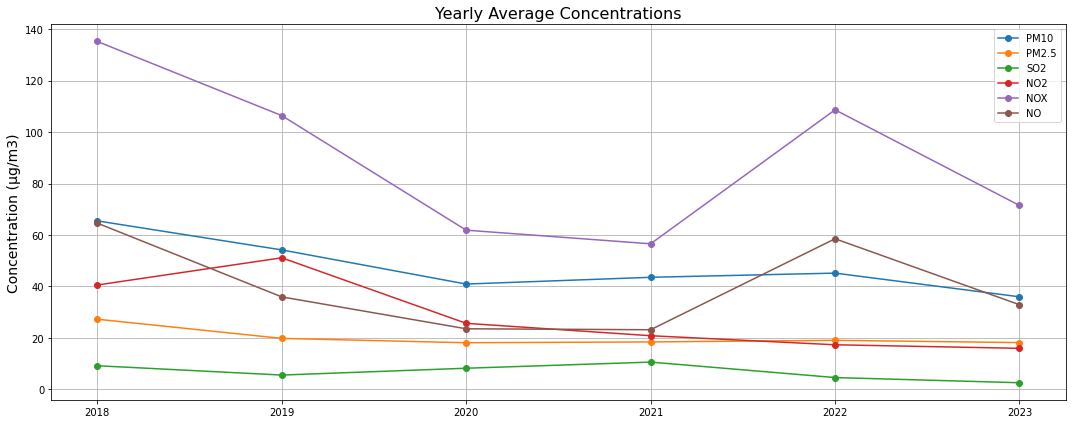

In [28]:
yearly_pm10_avg = df_filled_knn.resample('Y').mean()
plt.figure(figsize=(15, 6))

for i in df_filled_knn.columns:
    plt.plot(yearly_pm10_avg.index.year, yearly_pm10_avg[i], marker='o', linestyle='-', label=i)

plt.ylabel('Concentration (µg/m3)', fontsize=14)
plt.title('Yearly Average Concentrations', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

- In the graphs below, each pollutant is examined together with the annual limit values determined by WHO, EU and Turkey.

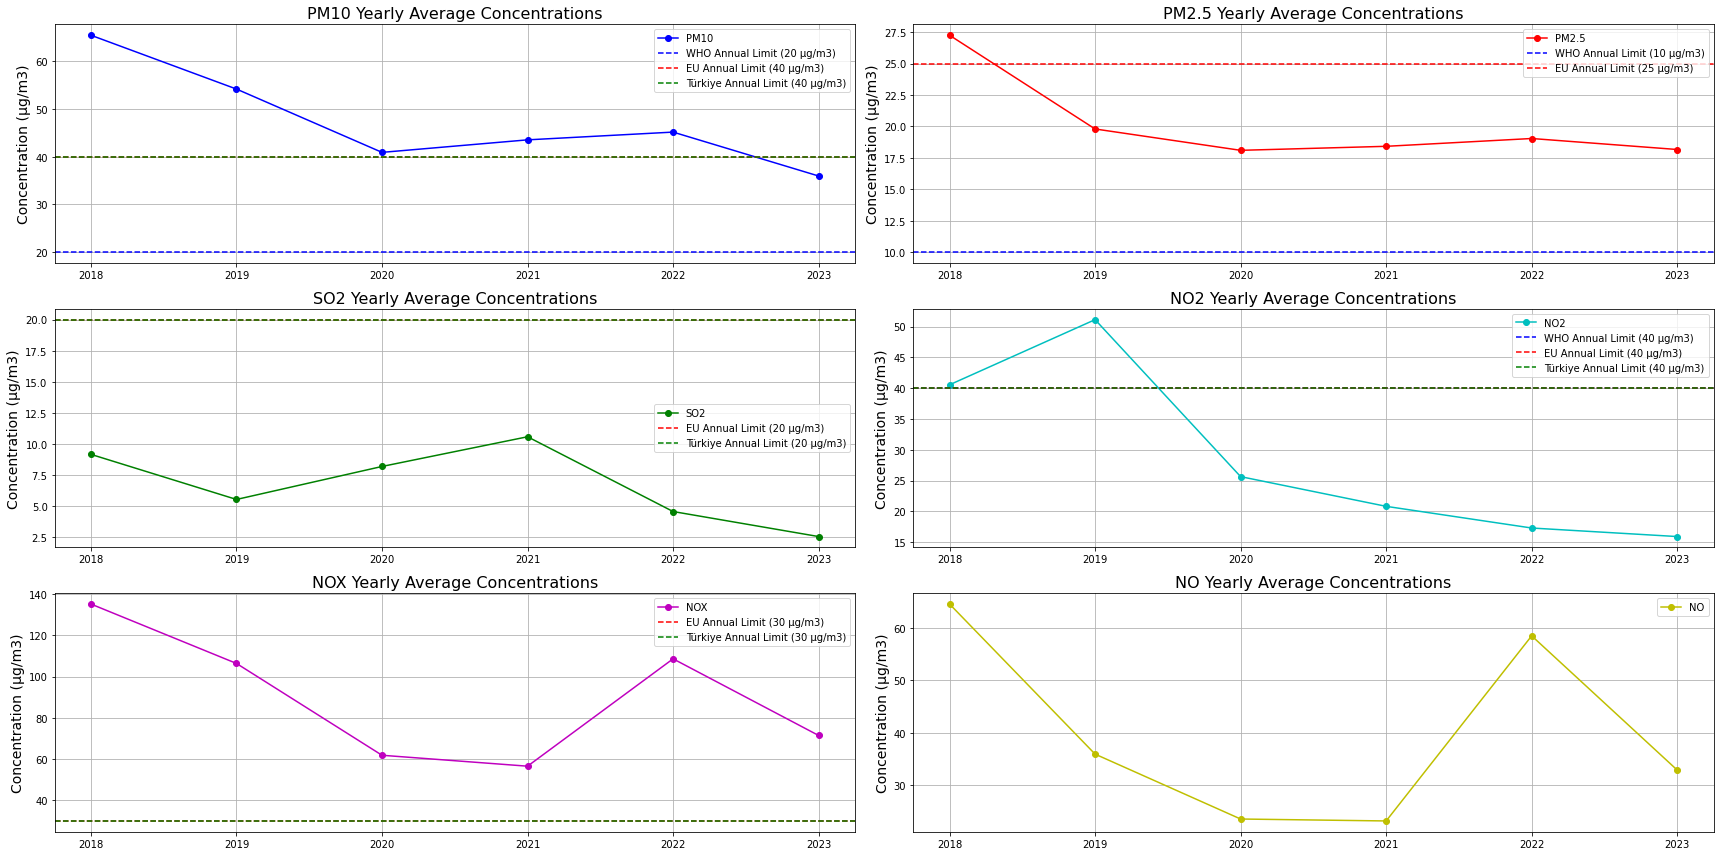

In [29]:
yearly_averages = df_filled_knn.resample('Y').mean()

limit_values = {
    'PM10': {'WHO': 20, 'EU': 40, 'Türkiye': 40},
    'PM2.5': {'WHO': 10, 'EU': 25, 'Türkiye': None},
    'SO2': {'WHO': None, 'EU': 20, 'Türkiye': 20},
    'NO2': {'WHO': 40, 'EU': 40, 'Türkiye': 40},
    'NOX': {'WHO': None, 'EU': 30, 'Türkiye': 30},
    'NO': {'WHO': None, 'EU': None, 'Türkiye': None}}

limit_colors = {'WHO': 'b', 'EU': 'r', 'Türkiye': 'g'}
color_palette = ['b', 'r', 'g', 'c', 'm', 'y']
plt.figure(figsize=(24, 12))
color_index = 0

for i, pollutant in enumerate(df_filled_knn.columns, start=1):
    plt.subplot(3, 2, i)
    
    line_color = color_palette[color_index]
    color_index = (color_index + 1) % len(color_palette)
    plt.plot(yearly_averages.index.year, yearly_averages[pollutant], marker='o', linestyle='-', label=pollutant, color=line_color)
    
    for limit_type, limit_value in limit_values[pollutant].items():
        if limit_value is not None:
            limit_color = limit_colors[limit_type]
            plt.axhline(y=limit_value, color=limit_color, linestyle='--', label=f'{limit_type} Annual Limit ({limit_value} µg/m3)')
    
    plt.ylabel('Concentration (µg/m3)', fontsize=14)
    plt.grid(True)
    plt.title(f'{pollutant} Yearly Average Concentrations', fontsize=16)
    plt.legend()

plt.tight_layout()
plt.show()

The graphs show that:
- The PM10 concentrations for almost all years exceed the limit values.
- The PM2.5 concentrations exceed the WHO limit, but are below the EU limit. The EU limit was exceeded only in 2018, but it should be noted that there is only 2 months of data for 2018 and these data are for the winter months (during which time air pollutants are expected to be on an increasing trend due to heating).
- The SO2 concentrations are below the limit values in all years, but interestingly, during the pandemic period, while the concentrations of all pollutants decreased, the SO2 concentrations increased.
- The NO2 concentrations exceeded all limit values in 2019, but they fell sharply with the pandemic period.
- The NOX concentrations exceed the limit values in all years.
- No limit value has been found in the literature for NO concentrations, but it is clearly seen that they decreased during the pandemic period and sharply increased after the pandemic.

### Air Quality Index (AQI)

In general, although such graphs give us an idea of pollutant concentrations, Air Quality Index can be calculated to better observe the effects of these pollutants on human health.

- The Air Quality Index is a measure used to measure the overall quality of air pollution in an area and to give people information about air quality. AQI is calculated based on the concentrations of different air pollutants and expressed on a specific scale.

- AQI is usually calculated using a formula or calculation method that includes specific air pollutants. These pollutants are substances such as particulate matter (PM2.5 and PM10), ozone (O3), sulfur dioxide (SO2), nitrogen dioxide (NO2) and carbon monoxide (CO), which have important effects on health in the atmosphere.

- The AQI value is usually a number and classifies air quality to some degree. This classification is usually divided into categories such as "Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy" and "Hazardous". In this way, the public can better understand the potential health effects of air quality and take action if necessary.

For more information about AQI : https://www.airnow.gov/aqi/aqi-basics/


- Using the pollutant concentrations in the dataset, the AQI value can be calculated for each pollutant.
- Since O3 and CO values were not measured at Kocaeli air quality station, only AQI was calculated for PM2.5 , PM10, SO2 and NO2.

In [30]:
df_aqi = df_filled_knn.copy()
df_aqi = df_aqi.drop(columns = (['NOX', 'NO']))

- Since 24-hour concentration values are used for PM2.5 and PM10 pollutants in AQI calculations, hourly concentrations are converted to daily concentrations.
- Daily averages are calculated as a rolling 24-hour average.
- The rolling 24-hour average is the average of a specific measurement over the last 24-hour time window. This average encompasses data points from a certain time point and the subsequent 23-hour period. It is calculated by taking the average of consecutive time intervals, providing the average value for the next 24-hour period for each data point. This type of average is useful for situations where data fluctuates irregularly or in a volatile manner. It is commonly employed in fields such as air quality monitoring, water levels assessment, and financial data analysis.

In [31]:
df_aqi['Daily_PM10_Avg'] = df_aqi['PM10'].rolling(window=24).mean()
df_aqi['Daily_PM2.5_Avg'] = df_aqi['PM2.5'].rolling(window=24).mean()
df_aqi = df_aqi.iloc[23:]  # Due to the nature of the floating 24-hour average method, the first 23 rows of the columns PM10_24hr_avg and PM2.5_24hr_avg are assigned NaN values. These NaN values removed from the dataset.
df_aqi

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg
Date,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417
...,...,...,...,...,...,...
2023-08-08 19:00:56,24.88,0.07,6.99,51.15,25.730000,7.790000
2023-08-08 20:00:56,21.88,2.03,6.70,52.32,25.290833,7.707917
2023-08-08 21:00:56,18.59,3.03,6.89,50.47,25.253750,7.657500


- The unit of SO2 and NO2 concentrations in the dataset is µg/m3, but SO2 and NO2 concentrations are used in ppb in EPA's AQI calculations. 
- For this reason, unit conversion was applied for SO2 and NO2 concentrations.

#### How to convert between µg/m3 – ppb
The formula for conversion between µg/m3 (micrograms per cubic metre) and ppb (parts per billion) are as follows:

Converting from ppb to µg/m3 is:

Concentration (µg/m3) = molecular weight x concentration (ppb) ÷ 24.45

Converting from µg/m3 to ppb is:

Concentration (ppb) = 24.45 x concentration (µg/m3) ÷ molecular weight 

The number 24.45 in the equation is the volume (litres) of a mole (gram molecular weight) of a gas when the temperature is at 25°C and the pressure is at 1 atmosphere (1 atm = 1.01325 bar). 


Below is a table with the conversion factors and the molecular weights of the NO2 and SO2 based on the formulas above at 25°C and 1 atm (standard atmospheric pressure):

| Air Pollutant           | Conversion Factor     | Molecular Weight    |
|-------------------------|------------------------|----------------------|
| Nitrogen dioxide (NO2)  | 1 ppb = 1.88 µg/m³     | 46.01 g/mol          |
| Sulphur dioxide (SO2)   | 1 ppb = 2.62 µg/m³     | 64.07 g/mol          |


For more information : https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/

In [32]:
# 'aqicalc' library is used for unit conversion operations (aqicalc imported as aqi).
df_aqi['SO2_ppb'] = df_aqi['SO2'].apply(lambda x: aqi.convert_grams_to_parts(x, aqi.POLLUTANT_SO2_1H))
df_aqi['NO2_ppb'] = df_aqi['NO2'].apply(lambda x: aqi.convert_grams_to_parts(x, aqi.POLLUTANT_NO2_1H))
df_aqi

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg,SO2_ppb,NO2_ppb
Date,,,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167,2.816794,6.005319
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083,2.984733,6.127660
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667,1.263359,12.037234
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333,0.877863,9.276596
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417,1.312977,10.835106
...,...,...,...,...,...,...,...,...
2023-08-08 19:00:56,24.88,0.07,6.99,51.15,25.730000,7.790000,2.667939,27.207447
2023-08-08 20:00:56,21.88,2.03,6.70,52.32,25.290833,7.707917,2.557252,27.829787
2023-08-08 21:00:56,18.59,3.03,6.89,50.47,25.253750,7.657500,2.629771,26.845745


- All values in the data set were made available for the AQI calculation. 
- AQI values can be calculated using the 'aqicalc' library.

In [33]:
selected_columns = ["Daily_PM10_Avg", "Daily_PM2.5_Avg", "SO2_ppb", "NO2_ppb"]
aqi_columns = ["AQI_PM10", "AQI_PM2.5", "AQI_SO2", "AQI_NO2"]

for i, column in enumerate(selected_columns):
    aqi_values = []
    pollutant_code = None
    if "Daily_PM10_Avg" in column:
        pollutant_code = aqi.POLLUTANT_PM10
    elif "Daily_PM2.5_Avg" in column:
        pollutant_code = aqi.POLLUTANT_PM25
    elif "SO2_ppb" in column:
        pollutant_code = aqi.POLLUTANT_SO2_1H
    elif "NO2_ppb" in column:
        pollutant_code = aqi.POLLUTANT_NO2_1H
    
    if pollutant_code is not None:
        for value in df_aqi[column]:
            if not np.isnan(value):
                aqi_value = aqi.to_aqi([(pollutant_code, str(value))])
                aqi_values.append(aqi_value)
            else:
                aqi_values.append(np.nan)
    else:
        aqi_values = [np.nan] * len(df_aqi)
    
    aqi_column_name = aqi_columns[i]
    df_aqi[aqi_column_name] = aqi_values

df_aqi.head()

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg,SO2_ppb,NO2_ppb,AQI_PM10,AQI_PM2.5,AQI_SO2,AQI_NO2
Date,,,,,,,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167,2.816794,6.005319,62,76,3,6
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083,2.984733,6.127660,61,76,3,6
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667,1.263359,12.037234,60,76,1,11
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333,0.877863,9.276596,60,77,0,8
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417,1.312977,10.835106,59,77,1,9


- If more than one pollutant is measured in a monitoring area, the largest or “dominant” AQI value for the location is reported.
- This situation can be checked by examining the stations in this link : https://sim.csb.gov.tr/Services/AirQuality
- Below, the highest AQI value was determined and added to the data set.

In [34]:
aqi_columns = ["AQI_PM10", "AQI_PM2.5", "AQI_SO2", "AQI_NO2"]
df_aqi['AQI_Max'] = df_aqi[aqi_columns].max(axis=1)
df_aqi

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg,SO2_ppb,NO2_ppb,AQI_PM10,AQI_PM2.5,AQI_SO2,AQI_NO2,AQI_Max
Date,,,,,,,,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167,2.816794,6.005319,62,76,3,6,76.0
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083,2.984733,6.127660,61,76,3,6,76.0
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667,1.263359,12.037234,60,76,1,11,76.0
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333,0.877863,9.276596,60,77,0,8,77.0
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417,1.312977,10.835106,59,77,1,9,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-08 19:00:56,24.88,0.07,6.99,51.15,25.730000,7.790000,2.667939,27.207447,23,32,3,25,32.0
2023-08-08 20:00:56,21.88,2.03,6.70,52.32,25.290833,7.707917,2.557252,27.829787,23,32,3,25,32.0
2023-08-08 21:00:56,18.59,3.03,6.89,50.47,25.253750,7.657500,2.629771,26.845745,23,32,3,25,32.0


- The names of the pollutants with the highest AQI value were added to the 'Dominant_Pollutant' column.

In [35]:
aqi_columns = ["AQI_PM10", "AQI_PM2.5", "AQI_SO2", "AQI_NO2"]
df_aqi[aqi_columns] = df_aqi[aqi_columns].astype(float)
dominant_pollutant_list = []

for index, row in df_aqi.iterrows():
    max_aqi_column = row[["AQI_PM10", "AQI_PM2.5", "AQI_SO2", "AQI_NO2"]].idxmax()
    dominant_pollutant_list.append(max_aqi_column.split("_")[1])

df_aqi['Dominant_Pollutant'] = dominant_pollutant_list
df_aqi

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg,SO2_ppb,NO2_ppb,AQI_PM10,AQI_PM2.5,AQI_SO2,AQI_NO2,AQI_Max,Dominant_Pollutant
Date,,,,,,,,,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167,2.816794,6.005319,62.0,76.0,3.0,6.0,76.0,PM2.5
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083,2.984733,6.127660,61.0,76.0,3.0,6.0,76.0,PM2.5
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667,1.263359,12.037234,60.0,76.0,1.0,11.0,76.0,PM2.5
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333,0.877863,9.276596,60.0,77.0,0.0,8.0,77.0,PM2.5
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417,1.312977,10.835106,59.0,77.0,1.0,9.0,77.0,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-08 19:00:56,24.88,0.07,6.99,51.15,25.730000,7.790000,2.667939,27.207447,23.0,32.0,3.0,25.0,32.0,PM2.5
2023-08-08 20:00:56,21.88,2.03,6.70,52.32,25.290833,7.707917,2.557252,27.829787,23.0,32.0,3.0,25.0,32.0,PM2.5
2023-08-08 21:00:56,18.59,3.03,6.89,50.47,25.253750,7.657500,2.629771,26.845745,23.0,32.0,3.0,25.0,32.0,PM2.5


- The categories determined according to the AQI_Max value have been added to the AQI_Category column.

In [36]:
def get_aqi_category(aqi_value):
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Moderate"
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi_value <= 200:
        return "Unhealthy"
    elif aqi_value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

aqi_categories = df_aqi['AQI_Max'].apply(get_aqi_category)
df_aqi['AQI_Category'] = aqi_categories

df_aqi.head()

,PM10,PM2.5,SO2,NO2,Daily_PM10_Avg,Daily_PM2.5_Avg,SO2_ppb,NO2_ppb,AQI_PM10,AQI_PM2.5,AQI_SO2,AQI_NO2,AQI_Max,Dominant_Pollutant,AQI_Category
Date,,,,,,,,,,,,,,,
2018-10-21 13:00:56,74.97,29.06,7.38,11.29,78.561667,23.919167,2.816794,6.005319,62.0,76.0,3.0,6.0,76.0,PM2.5,Moderate
2018-10-21 14:00:56,74.28,31.18,7.82,11.52,76.566667,24.007083,2.984733,6.127660,61.0,76.0,3.0,6.0,76.0,PM2.5,Moderate
2018-10-21 15:00:56,82.82,36.90,3.31,22.63,74.741250,24.251667,1.263359,12.037234,60.0,76.0,1.0,11.0,76.0,PM2.5,Moderate
2018-10-21 16:00:56,77.03,34.07,2.30,17.44,73.185000,24.343333,0.877863,9.276596,60.0,77.0,0.0,8.0,77.0,PM2.5,Moderate
2018-10-21 17:00:56,78.06,35.83,3.44,20.37,72.476667,24.665417,1.312977,10.835106,59.0,77.0,1.0,9.0,77.0,PM2.5,Moderate


#### Below, various queries have been conducted on the final state of the dataset to obtain different pieces of information.

In [37]:
max_aqi_value = df_aqi['AQI_Max'].max()
max_aqi_row = df_aqi[df_aqi['AQI_Max'] == max_aqi_value].iloc[0]
dominant_pollutant = max_aqi_row['Dominant_Pollutant']
max_aqi_category = max_aqi_row['AQI_Category']
max_aqi_date = max_aqi_row.name

print("Measurement Date:\t", max_aqi_date)
print("Highest AQI Value:\t", max_aqi_value)
print("Highest AQI Category:\t", max_aqi_category)
print("Dominant Pollutant:\t", dominant_pollutant)

Measurement Date:	 2021-11-09 02:00:56
Highest AQI Value:	 165.0
Highest AQI Category:	 Unhealthy
Dominant Pollutant:	 PM2.5


In [38]:
pollutant_counts = df_aqi['Dominant_Pollutant'].value_counts()
pollutant_ratios = pollutant_counts / len(df_aqi) * 100
pollutant_stats_df = pd.DataFrame({'Dominant Pollutant Counts': pollutant_counts, 'Dominant Pollutant Ratios (%)': pollutant_ratios})
pollutant_stats_df

,Dominant Pollutant Counts,Dominant Pollutant Ratios (%)
PM2.5,40733,96.847286
PM10,884,2.101809
NO2,407,0.967688
SO2,35,0.083216


In [39]:
category_counts = df_aqi['AQI_Category'].value_counts()
category_ratios = category_counts / len(df_aqi) * 100
category_stats_df = pd.DataFrame({'AQI Category Counts': category_counts, 'AQI Category Ratios (%)': category_ratios})
category_stats_df

,AQI Category Counts,AQI Category Ratios (%)
Moderate,24397,58.006610
Good,13495,32.085879
Unhealthy for Sensitive Groups,3651,8.680663
Unhealthy,516,1.226848


**When examining the final state of the dataset, significant findings have been obtained.**

- Between October 21, 2018 and August 8, 2023, the highest observed AQI value at the Kocaeli Air Quality Monitoring Station is 165. This high AQI value falls under the "Unhealty" category, and the dominant pollutant responsible for this is identified as PM2.5. This incident occurred on November 9, 2021.

- During this period, it's observed that high AQI values often coincide with the heating season, which is associated with increased emissions. Therefore, the occurrence of the highest AQI value during this period is expected.

- When examining the dominant pollutants, it is noted that PM2.5 holds the highest percentage at 96.85%, making it the most prevalent pollutant.

- Analyzing the AQI categories reveals that the majority of measurements (58%) fall under the "Moderate" air quality category. The "Good" category constitutes around 32.09%, the "Unhealthy for Sensitive Groups" category is at 8.68%, and the "Unhealty" category represents approximately 1.23% of the measurements.

In [40]:
df_aqi.to_csv("kocaeli_aqi.csv") # final dataset saved as csv file